#Detecting COVID patients using chest X-ray images

This code is the implementation of the below paper:

***An Efficient CNNModel for COVID-19 Disease Detection Based on X-Ray Image Classification***

In the paper, a Convolutional Neural Network (CNN) is designed using chest X-ray images of COVID patients and normal individuals. Given the life-threatening nature of this disease, training a high-accuracy network is of paramount importance.

##import libraries / loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import cv2
import os

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras import activations

In [ ]:
base_directory = './drive/MyDrive/xray_dataset_covid19/'

# Define sub-directories for training, validation, and testing data
sub_directories = ['train/', 'test/']

# Get a list of classes (sub-directories) inside the 'train/' directory
classes = os.listdir(
    os.path.join(base_directory, sub_directories[0])
)

print(classes)

['NORMAL', 'COVID']


In [ ]:
X = []
y = []

# Loop through the sub-directories (train, val, test)
for sub_dir in sub_directories:
    for c in range(len(classes)):
        dir = os.path.join(base_directory, sub_dir, classes[c])

        # Loop through files in the class directory
        print(c,dir)
        for f in os.listdir(dir):
            img = cv2.imread(os.path.join(dir, f))
            img = cv2.resize(img, (150, 150))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(c)

# Convert lists to numpy arrays and normalize pixel values
X = np.asarray(X)
y = np.asarray(y)

X.shape

0 ./drive/MyDrive/xray_dataset_covid19/train/NORMAL
1 ./drive/MyDrive/xray_dataset_covid19/train/COVID
0 ./drive/MyDrive/xray_dataset_covid19/test/NORMAL
1 ./drive/MyDrive/xray_dataset_covid19/test/COVID


(188, 150, 150, 3)

In [ ]:
X_train = X[:148]
y_train = y[:148]

X_test = X[148:]
y_test = y[148:]

X_train.shape,y_train.shape

((148, 150, 150, 3), (148,))

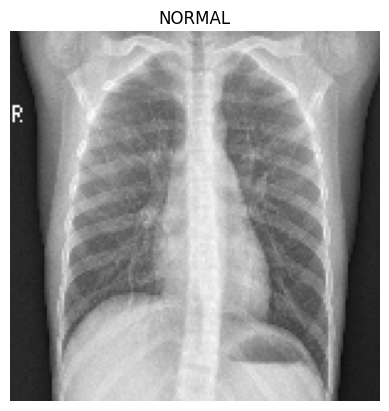

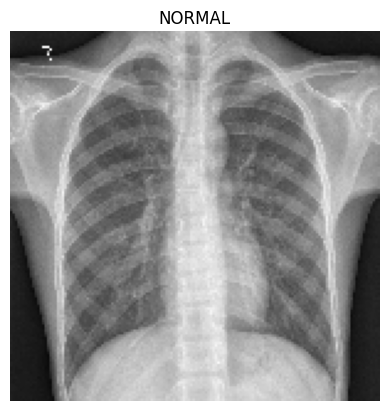

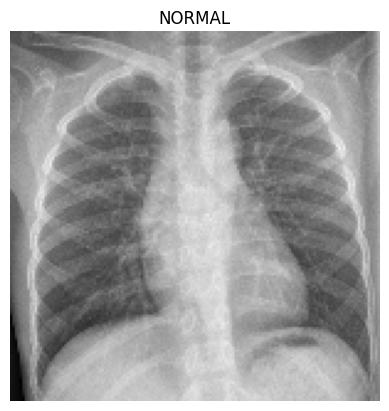

In [ ]:
for i in range(3):
  plt.imshow(X_train[i])
  plt.title(classes[y_train[i]])
  plt.axis("Off");
  plt.show()

In [ ]:
def flip_horizontal(images):
  datagen = keras.preprocessing.image.ImageDataGenerator()
  resultData = []
  for i in images:
    resultData.append(datagen.apply_transform(i,transform_parameters={'flip_horizontal':True}))
  return np.array(resultData)

def rotate90(images):
  datagen = keras.preprocessing.image.ImageDataGenerator()
  resultData = []
  for i in images:
    resultData.append(datagen.apply_transform(i,transform_parameters={'theta': 90}))
  return np.array(resultData)

def rotate180(images):
  datagen = keras.preprocessing.image.ImageDataGenerator()
  resultData = []
  for i in images:
    resultData.append(datagen.apply_transform(i,transform_parameters={'theta': 180}))
  return np.array(resultData)

def rotate270(images):
  datagen = keras.preprocessing.image.ImageDataGenerator()
  resultData = []
  for i in images:
    resultData.append(datagen.apply_transform(i,transform_parameters={'theta': 270}))
  return np.array(resultData)

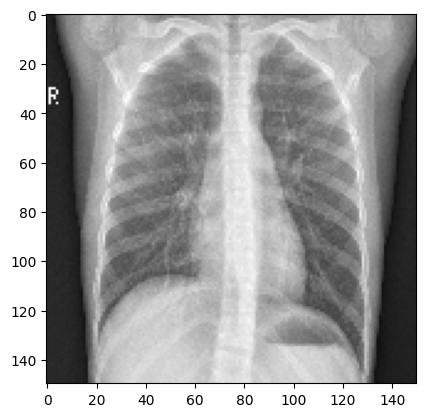

Flipped


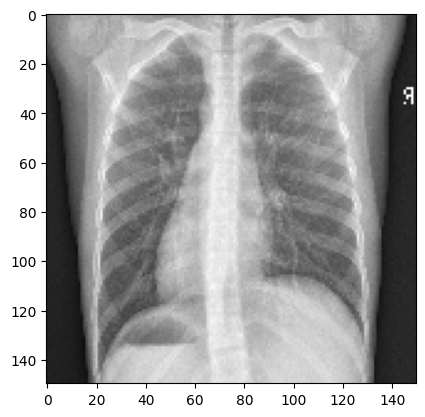

rotate90


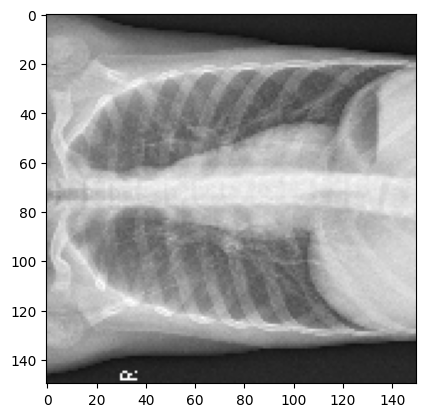

rotate180


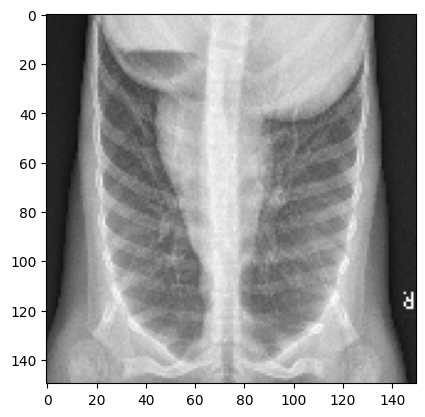

rotate270


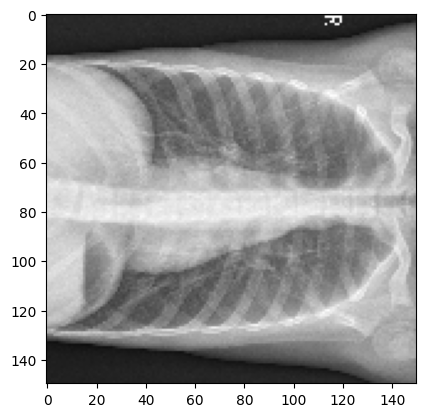

In [ ]:
for i in X_train[:1]:
  plt.imshow(i)
  plt.show()
  res = flip_horizontal(X_train[:1])
  print('Flipped')
  for j in res:
    plt.imshow(j)
    plt.show()
#####################################
  res = rotate90(X_train[:1])
  print('rotate90')
  for j in res:
    plt.imshow(j)
    plt.show()
#####################################
  res = rotate180(X_train[:1])
  print('rotate180')
  for j in res:
    plt.imshow(j)
    plt.show()
####################################
  res = rotate270(X_train[:1])
  print('rotate270')
  for j in res:
    plt.imshow(j)
    plt.show()

In [ ]:
flipped_images = flip_horizontal(X_train)
rot_90_images = rotate90(X_train)
rot_180_images = rotate180(X_train)
rot_270_images = rotate270(X_train)

print(X_train.shape)
print(flipped_images.shape)
print(rot_90_images.shape)
print(rot_180_images.shape)
print(rot_270_images.shape)

(148, 150, 150, 3)
(148, 150, 150, 3)
(148, 150, 150, 3)
(148, 150, 150, 3)
(148, 150, 150, 3)


## explaining the procedure:

1. preprocessing:

  We start by performing data augmentation according to the paper's instructions. We have four types of data augmentation. It is recommended to implement these four types step by step to prevent overfitting issues in your network. This means applying the first type of augmentation to the dataset, then training the network, analyzing the results, and then applying the second type, and so on. Additionally, normalization should be performed.

2. Training the network:

  we implement the CNN network according to the provided instructions and train it on the training data. Plot the Loss and Accuracy curves for both training and validation datasets.

##Section 1 - X_train




In [ ]:
!rm -r test
!rm -r train

from pathlib import Path
Path("./test/COVID").mkdir(parents=True, exist_ok=True)
Path("./test/NORMAL").mkdir(parents=True, exist_ok=True)

Path("./train/COVID").mkdir(parents=True, exist_ok=True)
Path("./train/NORMAL").mkdir(parents=True, exist_ok=True)

In [ ]:
from PIL import Image
c=1
arr = [X_test[:20]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_test[20:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from PIL import Image
c=1
arr = [X_train[:74]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_train[74:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = './train'
test_dir = './test'

batch_size = 32
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = True)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = True)

# Flow from directory for testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size = batch_size, # Change to 'categorical' if you have more than two classes
    shuffle=False  # Set to False for evaluation to maintain the order
)


Found 148 files belonging to 2 classes.
Using 126 files for training.
Found 148 files belonging to 2 classes.
Using 22 files for validation.
Found 40 files belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
)

Epoch 1/50
4/4 [==============================] - 15s 555ms/step - loss: 0.6200 - accuracy: 0.7063 - val_loss: 0.6227 - val_accuracy: 0.6818
Epoch 2/50
4/4 [==============================] - 1s 118ms/step - loss: 0.3120 - accuracy: 0.8730 - val_loss: 1.5043 - val_accuracy: 0.3182
Epoch 3/50
4/4 [==============================] - 0s 102ms/step - loss: 0.3190 - accuracy: 0.8730 - val_loss: 2.9645 - val_accuracy: 0.3182
Epoch 4/50
4/4 [==============================] - 0s 99ms/step - loss: 0.2332 - accuracy: 0.8968 - val_loss: 4.2531 - val_accuracy: 0.3182
Epoch 5/50
4/4 [==============================] - 0s 92ms/step - loss: 0.1413 - accuracy: 0.9444 - val_loss: 5.4305 - val_accuracy: 0.3182
Epoch 6/50
4/4 [==============================] - 0s 88ms/step - loss: 0.1513 - accuracy: 0.9683 - val_loss: 5.8098 - val_accuracy: 0.3182
Epoch 7/50
4/4 [==============================] - 0s 91ms/step - loss: 0.1114 - accuracy: 0.9683 - val_loss: 4.9136 - val_accuracy: 0.3182
Epoch 8/50
4/4 [=======

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 187ms/step - loss: 2.1422 - accuracy: 0.5000


[2.1421940326690674, 0.5]

In [ ]:
y_pred = model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
print(y_pred)

2/2 [==============================] - 0s 13ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# y_pred = []
# y_test = []
# for i, l in test_ds:
#   pred = model.predict(i,verbose=0)
#   pred = np.rint(pred)
#   y_pred.extend(pred)
#   y_test.extend(l)
# y_pred

Specificity: 1.0
Sensitivity: 0.0
Accuracy: 0.5
f1: 0.0
precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


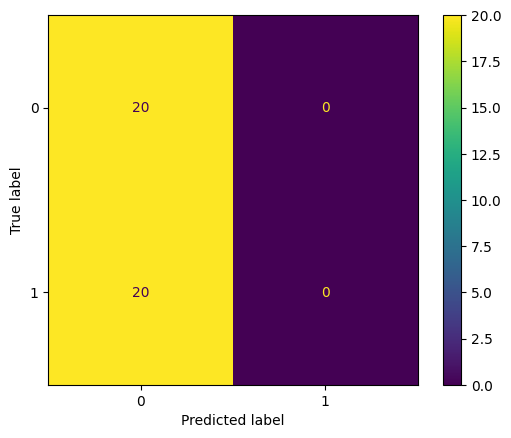

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import sensitive_score, specificity_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('f1:', f1)
print('precision:', precision)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Section 2 - X_train + Flipped Images

In [ ]:
!rm -r test
!rm -r train

from pathlib import Path
Path("./test/COVID").mkdir(parents=True, exist_ok=True)
Path("./test/NORMAL").mkdir(parents=True, exist_ok=True)

Path("./train/COVID").mkdir(parents=True, exist_ok=True)
Path("./train/NORMAL").mkdir(parents=True, exist_ok=True)

In [ ]:
from PIL import Image
c=1
arr = [X_test[:20]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_test[20:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from PIL import Image
c=1
arr = [X_train[:74],flipped_images[:74]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_train[74:],flipped_images[74:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = './train'
test_dir = './test'

batch_size = 32
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = True)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = True)

# Flow from directory for testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size = batch_size, # Change to 'categorical' if you have more than two classes
    shuffle=False  # Set to False for evaluation to maintain the order
)


Found 296 files belonging to 2 classes.
Using 252 files for training.
Found 296 files belonging to 2 classes.
Using 44 files for validation.
Found 40 files belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

# model.load_weights('checkpoint_')

Epoch 1/50
8/8 [==============================] - 8s 316ms/step - loss: 0.5579 - accuracy: 0.7103 - val_loss: 0.9086 - val_accuracy: 0.4318
Epoch 2/50
8/8 [==============================] - 1s 95ms/step - loss: 0.3795 - accuracy: 0.8532 - val_loss: 2.9456 - val_accuracy: 0.4318
Epoch 3/50
8/8 [==============================] - 1s 90ms/step - loss: 0.1812 - accuracy: 0.9246 - val_loss: 3.1359 - val_accuracy: 0.4318
Epoch 4/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0972 - accuracy: 0.9683 - val_loss: 4.7989 - val_accuracy: 0.4318
Epoch 5/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0683 - accuracy: 0.9722 - val_loss: 1.6555 - val_accuracy: 0.4318
Epoch 6/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0361 - accuracy: 0.9921 - val_loss: 1.4551 - val_accuracy: 0.4318
Epoch 7/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0398 - accuracy: 0.9841 - val_loss: 1.4826 - val_accuracy: 0.4318
Epoch 8/50
8/8 [==========

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 16ms/step - loss: 1.9086 - accuracy: 0.5250


[1.908648133277893, 0.5249999761581421]

In [ ]:
y_pred = model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
print(y_pred)

2/2 [==============================] - 0s 13ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# y_pred = []
# y_test = []
# for i, l in test_ds:
#   pred = model.predict(i,verbose=0)
#   pred = np.rint(pred)
#   y_pred.extend(pred)
#   y_test.extend(l)
# y_pred

Specificity: 1.0
Sensitivity: 0.05
Accuracy: 0.525
f1: 0.09523809523809523
precision: 1.0


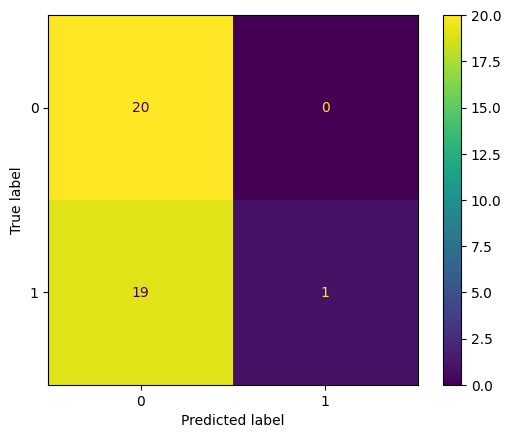

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import sensitive_score, specificity_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('f1:', f1)
print('precision:', precision)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Section 3 - X_train + Flipped Images + Rotate 90

In [ ]:
!rm -r test
!rm -r train

from pathlib import Path
Path("./test/COVID").mkdir(parents=True, exist_ok=True)
Path("./test/NORMAL").mkdir(parents=True, exist_ok=True)

Path("./train/COVID").mkdir(parents=True, exist_ok=True)
Path("./train/NORMAL").mkdir(parents=True, exist_ok=True)

In [ ]:
from PIL import Image
c=1
arr = [X_test[:20]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_test[20:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from PIL import Image
c=1
arr = [X_train[:74],flipped_images[:74],rot_90_images[:74]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_train[74:],flipped_images[74:],rot_90_images[74:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = './train'
test_dir = './test'

batch_size = 32
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = True)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = True)

# Flow from directory for testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size = batch_size, # Change to 'categorical' if you have more than two classes
    shuffle=False  # Set to False for evaluation to maintain the order
)


Found 444 files belonging to 2 classes.
Using 378 files for training.
Found 444 files belonging to 2 classes.
Using 66 files for validation.
Found 40 files belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

# model.load_weights('checkpoint_')

Epoch 1/50
12/12 [==============================] - 9s 198ms/step - loss: 0.6742 - accuracy: 0.5979 - val_loss: 3.9981 - val_accuracy: 0.4697
Epoch 2/50
12/12 [==============================] - 1s 92ms/step - loss: 0.3931 - accuracy: 0.8228 - val_loss: 3.8993 - val_accuracy: 0.4697
Epoch 3/50
12/12 [==============================] - 1s 86ms/step - loss: 0.2094 - accuracy: 0.9233 - val_loss: 2.9742 - val_accuracy: 0.4697
Epoch 4/50
12/12 [==============================] - 1s 92ms/step - loss: 0.1129 - accuracy: 0.9603 - val_loss: 1.9857 - val_accuracy: 0.4697
Epoch 5/50
12/12 [==============================] - 1s 84ms/step - loss: 0.0730 - accuracy: 0.9656 - val_loss: 1.0175 - val_accuracy: 0.4848
Epoch 6/50
12/12 [==============================] - 1s 85ms/step - loss: 0.0494 - accuracy: 0.9815 - val_loss: 2.6643 - val_accuracy: 0.4697
Epoch 7/50
12/12 [==============================] - 1s 85ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.9275 - val_accuracy: 0.5606
Epoch 8/50
1

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 13ms/step - loss: 0.9399 - accuracy: 0.7750


[0.9399440884590149, 0.7749999761581421]

In [ ]:
y_pred = model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
print(y_pred)

2/2 [==============================] - 0s 13ms/step
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# y_pred = []
# y_test = []
# for i, l in test_ds:
#   pred = model.predict(i,verbose=0)
#   pred = np.rint(pred)
#   y_pred.extend(pred)
#   y_test.extend(l)
# y_pred

Specificity: 0.55
Sensitivity: 1.0
Accuracy: 0.775
f1: 0.8163265306122449
precision: 0.6896551724137931


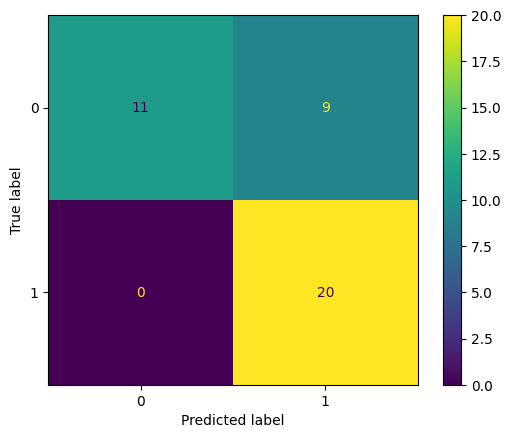

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import sensitive_score, specificity_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('f1:', f1)
print('precision:', precision)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Section 4 - X_train + Flipped Images + Rotate 90 + Rotate 180

In [ ]:
!rm -r test
!rm -r train

from pathlib import Path
Path("./test/COVID").mkdir(parents=True, exist_ok=True)
Path("./test/NORMAL").mkdir(parents=True, exist_ok=True)

Path("./train/COVID").mkdir(parents=True, exist_ok=True)
Path("./train/NORMAL").mkdir(parents=True, exist_ok=True)

In [ ]:
from PIL import Image
c=1
arr = [X_test[:20]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_test[20:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from PIL import Image
c=1
arr = [X_train[:74],flipped_images[:74],rot_90_images[:74],rot_180_images[:74]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_train[74:],flipped_images[74:],rot_90_images[74:],rot_180_images[74:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = './train'
test_dir = './test'

batch_size = 32
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = True)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = True)

# Flow from directory for testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size = batch_size, # Change to 'categorical' if you have more than two classes
    shuffle=False  # Set to False for evaluation to maintain the order
)


Found 592 files belonging to 2 classes.
Using 504 files for training.
Found 592 files belonging to 2 classes.
Using 88 files for validation.
Found 40 files belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

# model.load_weights('checkpoint_')

Epoch 1/50
16/16 [==============================] - 10s 152ms/step - loss: 0.6643 - accuracy: 0.6329 - val_loss: 0.9456 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 1s 83ms/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 2.4853 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 84ms/step - loss: 0.1504 - accuracy: 0.9405 - val_loss: 1.6022 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 1s 83ms/step - loss: 0.0696 - accuracy: 0.9821 - val_loss: 0.6569 - val_accuracy: 0.6023
Epoch 5/50
16/16 [==============================] - 1s 89ms/step - loss: 0.0635 - accuracy: 0.9821 - val_loss: 0.9851 - val_accuracy: 0.5114
Epoch 6/50
16/16 [==============================] - 1s 90ms/step - loss: 0.0719 - accuracy: 0.9702 - val_loss: 2.8823 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 2s 116ms/step - loss: 0.0642 - accuracy: 0.9742 - val_loss: 0.8173 - val_accuracy: 0.6136
Epoch 8/50

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 13ms/step - loss: 1.3924 - accuracy: 0.6750


[1.3923817873001099, 0.675000011920929]

In [ ]:
y_pred = model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
print(y_pred)

2/2 [==============================] - 0s 13ms/step
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# y_pred = []
# y_test = []
# for i, l in test_ds:
#   pred = model.predict(i,verbose=0)
#   pred = np.rint(pred)
#   y_pred.extend(pred)
#   y_test.extend(l)
# y_pred

Specificity: 0.35
Sensitivity: 1.0
Accuracy: 0.675
f1: 0.7547169811320755
precision: 0.6060606060606061


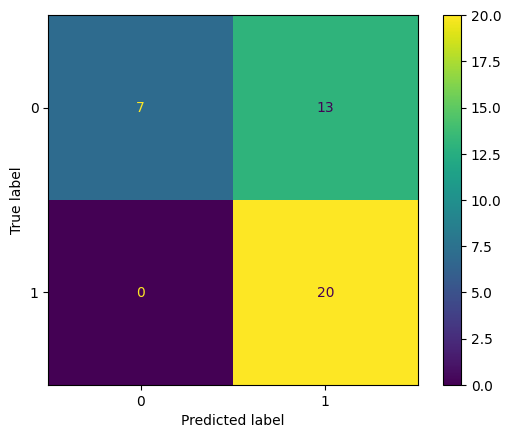

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import sensitive_score, specificity_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('f1:', f1)
print('precision:', precision)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Section 5 - X_train + Flipped Images + Rotate 90 + Rotate 180 + Rotate 270

In [ ]:
!rm -r test
!rm -r train

from pathlib import Path
Path("./test/COVID").mkdir(parents=True, exist_ok=True)
Path("./test/NORMAL").mkdir(parents=True, exist_ok=True)

Path("./train/COVID").mkdir(parents=True, exist_ok=True)
Path("./train/NORMAL").mkdir(parents=True, exist_ok=True)

rm: cannot remove 'test': No such file or directory
rm: cannot remove 'train': No such file or directory


In [ ]:
from PIL import Image
c=1
arr = [X_test[:20]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_test[20:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./test/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from PIL import Image
c=1
arr = [X_train[:74],flipped_images[:74],rot_90_images[:74],rot_180_images[:74],rot_270_images[:74]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/NORMAL/image' + str(c) + '.jpg')
    c+=1

from PIL import Image
c=1
arr = [X_train[74:],flipped_images[74:],rot_90_images[74:],rot_180_images[74:],rot_270_images[74:]]
for i in arr:
  for j in i:
    # image_array = j * 255
    image_array = j.astype(np.uint8)

  # Create a PIL Image from the numpy array
    image = Image.fromarray(image_array)

    # Save the image as a PNG file
    image.save('./train/COVID/image' + str(c) + '.jpg')
    c+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = './train'
test_dir = './test'

batch_size = 32
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = True)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = True)

# Flow from directory for testing data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size = batch_size, # Change to 'categorical' if you have more than two classes
    shuffle=False  # Set to False for evaluation to maintain the order
)


Found 740 files belonging to 2 classes.
Using 629 files for training.
Found 740 files belonging to 2 classes.
Using 111 files for validation.
Found 40 files belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

# model.load_weights('checkpoint_')

Epoch 1/50
20/20 [==============================] - 25s 182ms/step - loss: 0.5909 - accuracy: 0.7011 - val_loss: 1.9922 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 88ms/step - loss: 0.2646 - accuracy: 0.9126 - val_loss: 5.7529 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 95ms/step - loss: 0.1396 - accuracy: 0.9491 - val_loss: 2.4960 - val_accuracy: 0.5135
Epoch 4/50
20/20 [==============================] - 2s 95ms/step - loss: 0.1016 - accuracy: 0.9618 - val_loss: 5.2527 - val_accuracy: 0.5135
Epoch 5/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0937 - accuracy: 0.9746 - val_loss: 2.3785 - val_accuracy: 0.5135
Epoch 6/50
20/20 [==============================] - 2s 81ms/step - loss: 0.0590 - accuracy: 0.9793 - val_loss: 1.9098 - val_accuracy: 0.5135
Epoch 7/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0355 - accuracy: 0.9873 - val_loss: 1.2714 - val_accuracy: 0.5315
Epoch 8/50


In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 381ms/step - loss: 0.0360 - accuracy: 0.9750


[0.03596311807632446, 0.9750000238418579]

In [ ]:
y_pred = model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
print(y_pred)

2/2 [==============================] - 0s 13ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# y_pred = []
# y_test = []
# for i, l in test_ds:
#   pred = model.predict(i,verbose=0)
#   pred = np.rint(pred)
#   y_pred.extend(pred)
#   y_test.extend(l)
# y_pred

Specificity: 0.95
Sensitivity: 1.0
Accuracy: 0.975
f1: 0.975609756097561
precision: 0.9523809523809523


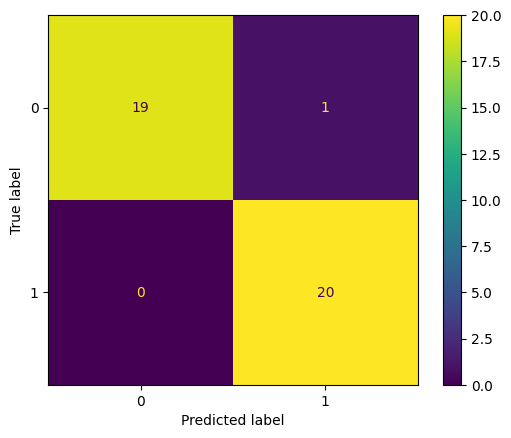

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import sensitive_score, specificity_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Specificity:', specificity)
print('Sensitivity:', sensitivity)
print('Accuracy:', accuracy)
print('f1:', f1)
print('precision:', precision)

cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

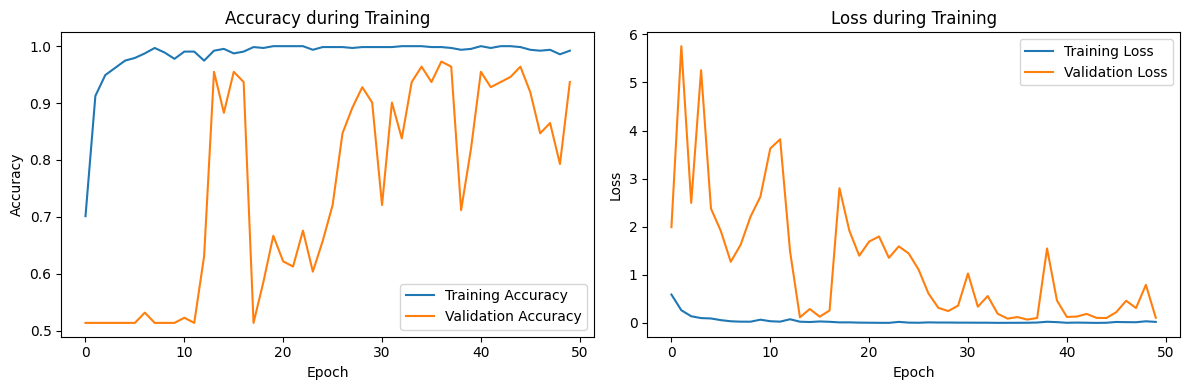

In [ ]:
# Plot accuracy and loss during training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy during Training')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss during Training')

plt.tight_layout()
plt.show()

In [ ]:
accuracy_arr_val = []
accuracy_arr_test = []

##section1 - One layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(64,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(128,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(128,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 5s 109ms/step - loss: 0.2604 - accuracy: 0.8903 - val_loss: 1.5785 - val_accuracy: 0.8018
Epoch 2/50
20/20 [==============================] - 2s 101ms/step - loss: 0.1015 - accuracy: 0.9634 - val_loss: 0.8174 - val_accuracy: 0.8108
Epoch 3/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0487 - accuracy: 0.9857 - val_loss: 1.3694 - val_accuracy: 0.7477
Epoch 4/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 3.5673 - val_accuracy: 0.5676
Epoch 5/50
20/20 [==============================] - 2s 108ms/step - loss: 0.0152 - accuracy: 0.9968 - val_loss: 0.4795 - val_accuracy: 0.8468
Epoch 6/50
20/20 [==============================] - 2s 106ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.2232 - val_accuracy: 0.9369
Epoch 7/50
20/20 [==============================] - 2s 114ms/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 2.3311 - val_accuracy: 0.5946
Epoch 

In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 15ms/step - loss: 3.6325 - accuracy: 0.5495
[0.7749999761581421] [0.5495495200157166]


##section2 -  Two layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(128,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(128,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 8s 145ms/step - loss: 0.2358 - accuracy: 0.8903 - val_loss: 32.7460 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0432 - accuracy: 0.9905 - val_loss: 9.7361 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0287 - accuracy: 0.9889 - val_loss: 3.2547 - val_accuracy: 0.5586
Epoch 4/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0177 - accuracy: 0.9968 - val_loss: 3.5468 - val_accuracy: 0.5586
Epoch 5/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.7987 - val_accuracy: 0.7838
Epoch 6/50
20/20 [==============================] - 2s 88ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.4028 - val_accuracy: 0.8378
Epoch 7/50
20/20 [==============================] - 2s 95ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.8649
Epoch 8/50


In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 15ms/step - loss: 0.4007 - accuracy: 0.8739
[0.7749999761581421, 0.9750000238418579] [0.5495495200157166, 0.8738738894462585]


##section3 - Three layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(128,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 13s 123ms/step - loss: 0.2801 - accuracy: 0.8871 - val_loss: 41.2039 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 86ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 15.7030 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0285 - accuracy: 0.9921 - val_loss: 7.5514 - val_accuracy: 0.5135
Epoch 4/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0280 - accuracy: 0.9936 - val_loss: 6.5276 - val_accuracy: 0.5135
Epoch 5/50
20/20 [==============================] - 2s 87ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 3.3853 - val_accuracy: 0.5586
Epoch 6/50
20/20 [==============================] - 2s 88ms/step - loss: 0.0314 - accuracy: 0.9921 - val_loss: 0.4504 - val_accuracy: 0.8378
Epoch 7/50
20/20 [==============================] - 2s 93ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.7375 - val_accuracy: 0.7748
Epoch 8/5

In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 22ms/step - loss: 0.4176 - accuracy: 0.9009
[0.7749999761581421, 0.9750000238418579, 0.925000011920929] [0.5495495200157166, 0.8738738894462585, 0.9009009003639221]


##section4 -Four layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 12s 133ms/step - loss: 0.2753 - accuracy: 0.8871 - val_loss: 23.0309 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 99ms/step - loss: 0.0579 - accuracy: 0.9793 - val_loss: 28.6384 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 102ms/step - loss: 0.0303 - accuracy: 0.9921 - val_loss: 15.0629 - val_accuracy: 0.5135
Epoch 4/50
20/20 [==============================] - 2s 106ms/step - loss: 0.0236 - accuracy: 0.9968 - val_loss: 4.4028 - val_accuracy: 0.5135
Epoch 5/50
20/20 [==============================] - 2s 109ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 3.7437 - val_accuracy: 0.5135
Epoch 6/50
20/20 [==============================] - 2s 110ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.3778 - val_accuracy: 0.8198
Epoch 7/50
20/20 [==============================] - 2s 94ms/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.5454 - val_accuracy: 0.8378
Epoc

In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 20ms/step - loss: 0.6377 - accuracy: 0.8378
[0.7749999761581421, 0.9750000238418579, 0.925000011920929, 0.949999988079071] [0.5495495200157166, 0.8738738894462585, 0.9009009003639221, 0.837837815284729]


##section5 - Five layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    # keras.layers.Conv2D(256,(3,3),padding="same"),
                    # keras.layers.MaxPooling2D(2,2),
                    # keras.layers.BatchNormalization(axis=-1),
                    # keras.layers.Activation(activations.relu),
                    # keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 6s 95ms/step - loss: 0.4571 - accuracy: 0.7886 - val_loss: 5.4421 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 83ms/step - loss: 0.1244 - accuracy: 0.9587 - val_loss: 3.4207 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 81ms/step - loss: 0.0813 - accuracy: 0.9730 - val_loss: 1.7645 - val_accuracy: 0.5315
Epoch 4/50
20/20 [==============================] - 2s 86ms/step - loss: 0.0611 - accuracy: 0.9793 - val_loss: 2.9904 - val_accuracy: 0.5135
Epoch 5/50
20/20 [==============================] - 2s 90ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 4.0694 - val_accuracy: 0.5135
Epoch 6/50
20/20 [==============================] - 2s 90ms/step - loss: 0.0233 - accuracy: 0.9952 - val_loss: 1.0584 - val_accuracy: 0.5766
Epoch 7/50
20/20 [==============================] - 2s 90ms/step - loss: 0.0278 - accuracy: 0.9905 - val_loss: 3.0350 - val_accuracy: 0.5135
Epoch 8/50
20

In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 22ms/step - loss: 0.2085 - accuracy: 0.9369
[0.7749999761581421, 0.9750000238418579, 0.925000011920929, 0.949999988079071, 0.949999988079071] [0.5495495200157166, 0.8738738894462585, 0.9009009003639221, 0.837837815284729, 0.9369369149208069]


##section6 - Six layer CNN

In [ ]:
model = keras.Sequential([
                    keras.layers.Conv2D(64,(3,3),padding="same",input_shape=(150,150,3)),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(64,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(128,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Conv2D(256,(3,3),padding="same"),
                    keras.layers.MaxPooling2D(2,2),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dropout(0.2),

                    keras.layers.Flatten(),

                    keras.layers.Dense(512),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(256),
                    keras.layers.BatchNormalization(axis=-1),
                    keras.layers.Activation(activations.relu),
                    keras.layers.Dense(1, activation='sigmoid')

])


# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='checkpoint_',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

batch_size = 32

optimizer = keras.optimizers.Adam(learning_rate=0.0006)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    batch_size=batch_size,
    epochs = 50,
    validation_data = val_ds
    # callbacks=[model_checkpoint_callback]
)

Epoch 1/50
20/20 [==============================] - 9s 98ms/step - loss: 0.5324 - accuracy: 0.7409 - val_loss: 2.1448 - val_accuracy: 0.5135
Epoch 2/50
20/20 [==============================] - 2s 82ms/step - loss: 0.2068 - accuracy: 0.9269 - val_loss: 7.0438 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 2s 83ms/step - loss: 0.1033 - accuracy: 0.9666 - val_loss: 6.1639 - val_accuracy: 0.5135
Epoch 4/50
20/20 [==============================] - 2s 83ms/step - loss: 0.0737 - accuracy: 0.9762 - val_loss: 3.7422 - val_accuracy: 0.5135
Epoch 5/50
20/20 [==============================] - 2s 85ms/step - loss: 0.0935 - accuracy: 0.9666 - val_loss: 3.0037 - val_accuracy: 0.5135
Epoch 6/50
20/20 [==============================] - 2s 94ms/step - loss: 0.0595 - accuracy: 0.9777 - val_loss: 2.8958 - val_accuracy: 0.5135
Epoch 7/50
20/20 [==============================] - 2s 94ms/step - loss: 0.0489 - accuracy: 0.9809 - val_loss: 2.1184 - val_accuracy: 0.5135
Epoch 8/50
20

In [ ]:
y_pred = model.evaluate(test_ds)
accuracy_arr_test.append(y_pred[1])

y_pred = model.evaluate(val_ds)
accuracy_arr_val.append(y_pred[1])

print(accuracy_arr_test, accuracy_arr_val)

4/4 [==============================] - 0s 16ms/step - loss: 0.0549 - accuracy: 0.9640
[0.7749999761581421, 0.9750000238418579, 0.925000011920929, 0.949999988079071, 0.949999988079071, 0.949999988079071] [0.5495495200157166, 0.8738738894462585, 0.9009009003639221, 0.837837815284729, 0.9369369149208069, 0.9639639854431152]


##Table 6 - Results


In [ ]:
print('# layers               Test accuracy             val accuracy')
print("one Conv2d:               ", "{:.2f}".format(accuracy_arr_test[0]),'                 ', "{:.2f}".format(accuracy_arr_val[0]))
print("two Conv2d:               ", "{:.2f}".format(accuracy_arr_test[1]),'                 ', "{:.2f}".format(accuracy_arr_val[1]))
print("three Conv2d:             ", "{:.2f}".format(accuracy_arr_test[2]),'                 ', "{:.2f}".format(accuracy_arr_val[2]))
print("four Conv2d:              ", "{:.2f}".format(accuracy_arr_test[3]),'                 ', "{:.2f}".format(accuracy_arr_val[3]))
print("five Conv2d:              ", "{:.2f}".format(accuracy_arr_test[4]),'                 ', "{:.2f}".format(accuracy_arr_val[4]))
print("six Conv2d:               ", "{:.2f}".format(accuracy_arr_test[5]),'                 ', "{:.2f}".format(accuracy_arr_val[5]))

# layers               Test accuracy             val accuracy
one Conv2d:                0.77                   0.55
two Conv2d:                0.98                   0.87
three Conv2d:              0.93                   0.90
four Conv2d:               0.95                   0.84
five Conv2d:               0.95                   0.94
six Conv2d:                0.95                   0.96
